In [6]:
pip install spotipy

In [38]:
import os
import pandas as pd
import spotipy
import spotipy.util as util
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

In [22]:
#Declaramos las credenciales
# cid = os.environ['SPOTIFY_CLIENT_ID']
# secret = os.environ['SPOTIFY_CLIENT_SECRET']
redirect_uri='http://localhost:7777/callback'
username = 'carolinamerlo'

In [23]:
sp = spotipy.Spotify() 
cid ="d87059a2d82c473a8c1e63abc307ffc0"
secret = "e9ea16be7cb24ef68f4fd54a0b838c3f"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False


In [24]:
# Authorization flow
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

Couldn't read cache at: .cache-carolinamerlo
Couldn't read cache at: .cache-carolinamerlo


In [25]:
# Fetch the user's playlists
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [26]:
def fetch_playlists(sp, username):
    """
    Devuelve lsa playlist del usuario
    
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [27]:
fetch_playlists(sp,username)

,id,name,#tracks
0,37i9dQZF1DWXTdx4nYEjeS,Mates y Música,90
1,60sR9vObbixQxYniTj0fNo,Trapos de cuartentena,57
2,7MTJxFSv8iu1Eqy8oxt7cL,HDW,8
3,29AjFPDaoSJjJB4xpIDiPQ,Presentación del Plan de Negocios,1
4,5ZtbTYJ27Rp8L0O9fXpV0W,Mates y música,101
5,4jfe2De9ShpzpdXUUKxm6o,Los palmeras,4
6,2W0RycULD2x8zit04A76gD,mix,11
7,2GvJMAsxx7BUBr9AlRhvoN,Ochentosos,20
8,272Wdk2khtPnbDDIDKj7v4,Retro,36
9,1Aqa3yqLfFfYKw9uNJJ3Ho,Clásicos lentos,62


In [28]:
playlist_id = "60sR9vObbixQxYniTj0fNo"

In [29]:
def fetch_playlist_tracks(sp, username, playlist_id):
    """
    Nos trae las canciones de la playlist que queremos --> playlist_id
    
    """
        
    offset = 0
    tracks = []
    
    # Make the API request
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None, limit=100, offset=offset, market=None)
        tracks += content['items']
        
        if content['next'] is not None:
            offset += 100
        else:
            break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
    
    # Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [30]:
fetch_playlist_tracks(sp, username, playlist_id)

,track_id,track_name
0,2t98sYRAQZAXqdwi3Sf6pQ,Sentimento Safari
1,3EtXiDhRO8psTWs2uY8nyA,Hoji N'ka ta Rola
2,6MLQRF8D7LsOvZwkt1UcZP,Vivi Good
3,3PS7DV9nHtL6FhgSPh0d8z,Hoji en Sá Ta Vivi
4,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch)
5,3Dv1eDb0MEgF93GpLXlucZ,Say So
6,3dVvWnj4D8JGkKvo6Hucso,TROLLZ (with Nicki Minaj)
7,1X3ltingEVNGRoJf1dvZfQ,Somos Iguais
8,54MFLMtI1lDZXzWCnrL2jo,Tu vas me manquer - Pilule bleue
9,2MOq63fxuFLYQM3CsDcFs1,menina solta


In [31]:
#Extraemos las caracteristicas de cada cancion de una playlist.
def fetch_audio_features(sp, username, playlist_id):
    playlist = fetch_playlist_tracks(sp, username, playlist_id)
    index = 0
    audio_features = []
    
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence'],
                              features['speechiness'], features['instrumentalness'],
                              features['liveness'], features['acousticness']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence',
                                                             'speechiness', 'instrumentalness',
                                                             'liveness', 'acousticness'])
    
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
        
    return df_playlist_audio_features


In [32]:
df = fetch_audio_features(sp, username, playlist_id)

In [33]:
df

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
2t98sYRAQZAXqdwi3Sf6pQ,Sentimento Safari,0.801,0.868,103.017,-7.882,0.3930,0.3970,0.000000,0.0761,0.19000
3EtXiDhRO8psTWs2uY8nyA,Hoji N'ka ta Rola,0.580,0.503,126.588,-8.658,0.5420,0.2630,0.000013,0.1170,0.51700
6MLQRF8D7LsOvZwkt1UcZP,Vivi Good,0.826,0.800,104.988,-7.392,0.5960,0.1040,0.000002,0.0862,0.53900
3PS7DV9nHtL6FhgSPh0d8z,Hoji en Sá Ta Vivi,0.882,0.519,119.906,-9.748,0.3220,0.3020,0.000000,0.0755,0.47300
7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),0.746,0.690,89.977,-7.956,0.4970,0.1640,0.000000,0.1010,0.24700
3Dv1eDb0MEgF93GpLXlucZ,Say So,0.787,0.673,110.962,-4.577,0.7860,0.1580,0.000004,0.0904,0.25600
3dVvWnj4D8JGkKvo6Hucso,TROLLZ (with Nicki Minaj),0.744,0.422,180.006,-8.946,0.4930,0.2940,0.000110,0.1100,0.03190
1X3ltingEVNGRoJf1dvZfQ,Somos Iguais,0.645,0.699,91.704,-7.634,0.5740,0.1740,0.000291,0.1180,0.30600
54MFLMtI1lDZXzWCnrL2jo,Tu vas me manquer - Pilule bleue,0.768,0.748,115.958,-5.095,0.3340,0.0289,0.031300,0.1110,0.07220


In [34]:
df.to_csv('my-playlist.csv')

Exploratory Data Analysis (EDA)

Feature	Description

ACOUSTICNESS: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

DANCEABILITY: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
energy	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

INSTRUMENTALNESS: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

LIVENESS: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

LOUDNESS: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

SPEECHINESS:	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

TEMPO: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

VALANCE: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [35]:
df = pd.read_csv("my-playlist.csv")

In [59]:
tempo_descendiente = df.sort_values(by="tempo", ascending=False)

tempo = []
for i in tempo_descendiente["tempo"]:
    tempo.append(i)

nombre = []
for i in tempo_descendiente["track_name"]:
    nombre.append(i)
    
tempo_df = ({
    "nombre": nombre,
    "tempo": tempo
    
})

print(nombre, tempo)  

['High (Remix)', 'TROLLZ (with Nicki Minaj)', 'GOOBA', 'CANGURO', 'BLIND (feat. Young Thug)', 'Herr Mannelig', 'Alitas de mar (feat. Juanito Makandé)', 'Ya No Más', 'WHATS POPPIN', 'Life Is Good (feat. Drake)', 'Lemonade (Feat. Roddy Ricch & Don Toliver) [Remix]', 'À nos souvenirs', 'Ramito de violetas', 'Dragostea Din Tei', 'Te gusta', "Hoji N'ka ta Rola", 'Call on Me', 'In My Mind', 'Red Cat', 'All Around The World (La La La)', 'Tempo (feat. T-Rex, LON3R JOHNY & BISPO)', 'Vuelo', 'Djomb - Bien ou quoi', 'Tiago', 'Adrenalizou - Gabriel Boni Remix', 'Hoji en Sá Ta Vivi', 'Perfect (feat. Haris)', 'Se Muere por Volver', 'Tu vas me manquer - Pilule bleue', 'Girls Just Wanna Have Some', 'Bored In The House', 'Say So', 'Cuatro Coplas de Luna', 'Pornochick', 'Bailé', 'Vivi Good', 'Out of My Head', 'Sentimento Safari', 'Tienes Flow - Mix 2019', 'Wake Up Dead', 'FML', 'Blueberry Faygo', 'Back (feat. Yo Gotti)', "Flexin'", 'Cadeaux - Pilule bleue', 'Look Back at It', 'Ignorantes', 'Sangría - co

In [57]:
display(tempo_df)

{'nombre': ['High (Remix)',
  'TROLLZ (with Nicki Minaj)',
  'GOOBA',
  'CANGURO',
  'BLIND (feat. Young Thug)',
  'Herr Mannelig',
  'Alitas de mar (feat. Juanito Makandé)',
  'Ya No Más',
  'WHATS POPPIN',
  'Life Is Good (feat. Drake)',
  'Lemonade (Feat. Roddy Ricch & Don Toliver) [Remix]',
  'À nos souvenirs',
  'Ramito de violetas',
  'Dragostea Din Tei',
  'Te gusta',
  "Hoji N'ka ta Rola",
  'Call on Me',
  'In My Mind',
  'Red Cat',
  'All Around The World (La La La)',
  'Tempo (feat. T-Rex, LON3R JOHNY & BISPO)',
  'Vuelo',
  'Djomb - Bien ou quoi',
  'Tiago',
  'Adrenalizou - Gabriel Boni Remix',
  'Hoji en Sá Ta Vivi',
  'Perfect (feat. Haris)',
  'Se Muere por Volver',
  'Tu vas me manquer - Pilule bleue',
  'Girls Just Wanna Have Some',
  'Bored In The House',
  'Say So',
  'Cuatro Coplas de Luna',
  'Pornochick',
  'Bailé',
  'Vivi Good',
  'Out of My Head',
  'Sentimento Safari',
  'Tienes Flow - Mix 2019',
  'Wake Up Dead',
  'FML',
  'Blueberry Faygo',
  'Back (feat. 

Text(0.5, 1.0, 'Canciones de playlist ordenadas by tempo')

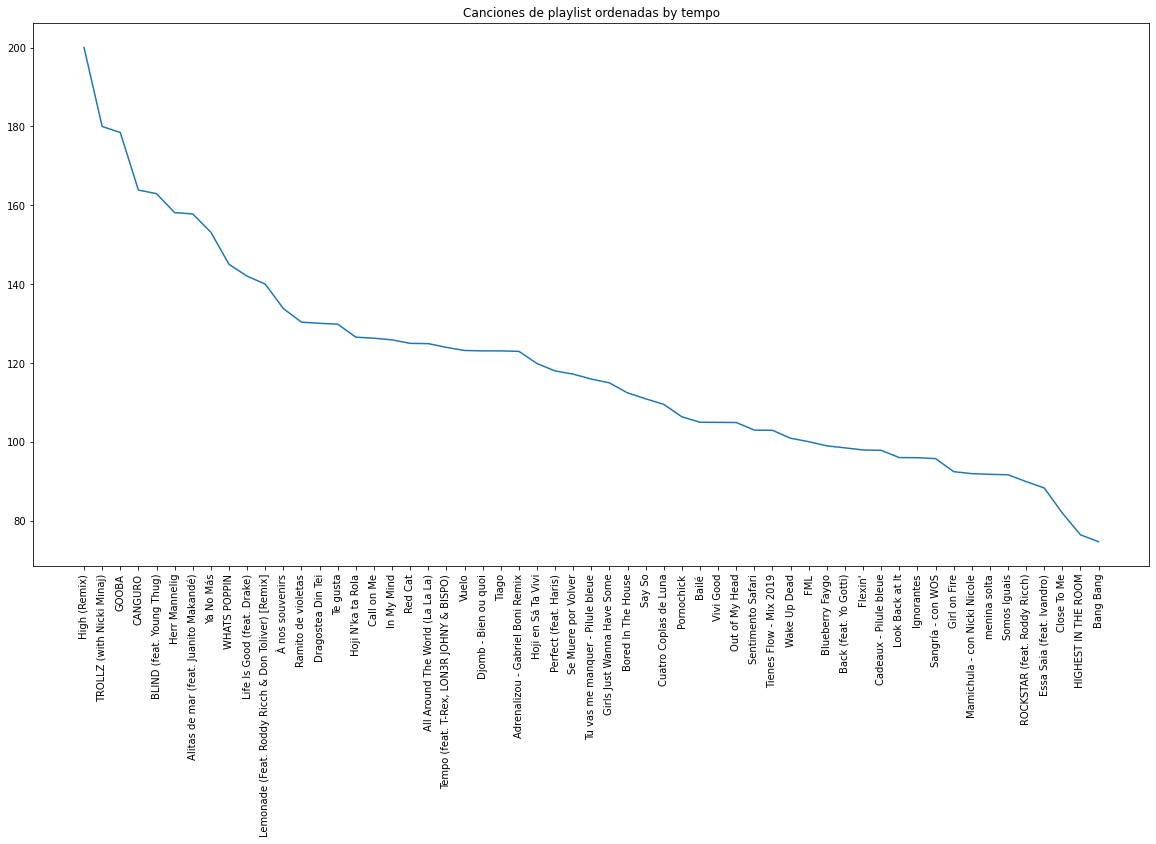

In [75]:
plt.figure(figsize=(20, 10))
plt.plot(nombre, tempo)
plt.xticks(rotation=90)
plt.title("Canciones de playlist ordenadas by tempo")

In [76]:
danceability_descendiente = df.sort_values(by="danceability", ascending=False)

In [77]:
danceability_descendiente

,track_id,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
15,0KBwGCY9RYD9t2zjeW4h48,Djomb - Bien ou quoi,0.945,0.676,123.109,-6.600,0.6310,0.2070,0.000360,0.3220,0.17200
44,5i6KIRmxfGyVEGcG44YpZs,Red Cat,0.943,0.620,125.015,-6.153,0.0947,0.2920,0.894000,0.0845,0.10900
28,5OxveXfvga2t0se21d96Ow,Bored In The House,0.928,0.372,112.458,-10.393,0.7320,0.3210,0.000010,0.0948,0.02020
24,1jaTQ3nqY3oAAYyCTbIvnM,WHATS POPPIN,0.923,0.604,145.062,-6.671,0.8260,0.2450,0.000000,0.2720,0.01700
3,3PS7DV9nHtL6FhgSPh0d8z,Hoji en Sá Ta Vivi,0.882,0.519,119.906,-9.748,0.3220,0.3020,0.000000,0.0755,0.47300
45,0xPHSq6w4bvHBwqU6xWe2u,Tienes Flow - Mix 2019,0.880,0.613,102.983,-6.337,0.7700,0.0867,0.000001,0.0482,0.12300
22,3wYRLYuO1M88d8woWUIxct,Ignorantes,0.850,0.536,96.029,-5.161,0.5050,0.0599,0.000039,0.0996,0.26700
42,0hwEhPxCBLKiqeBMZavGAv,Flexin',0.840,0.488,97.984,-6.156,0.8500,0.0684,0.000000,0.1030,0.19100
53,5sBplhIrmzA4kQGyIOpmDf,Lemonade (Feat. Roddy Ricch & Don Toliver) [Re...,0.832,0.549,140.045,-8.259,0.3840,0.0602,0.000000,0.1100,0.16800
2,6MLQRF8D7LsOvZwkt1UcZP,Vivi Good,0.826,0.800,104.988,-7.392,0.5960,0.1040,0.000002,0.0862,0.53900
